In [1]:
#!pip install pandas
#!pip install numpy
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib
#!pip install statsmodels

In [2]:
import numpy as np
import scipy
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#boston_df=pd.read_csv(boston_url)
boston_df=pd.read_csv(r'C:\Users\WIF4rt\Downloads\boston_housing.csv')
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

**Plot of the median Value**

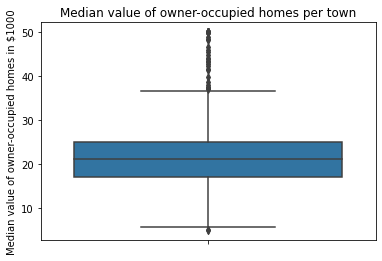

In [4]:
ax = sns.boxplot(y = boston_df['MEDV']).set(
    title='Median value of owner-occupied homes per town',
    ylabel = 'Median value of owner-occupied homes in $1000'
)
plt.show()

We can see a wide spread in median house prices between towns 

**Comparison of median value for town which do or do not border the Charles River**

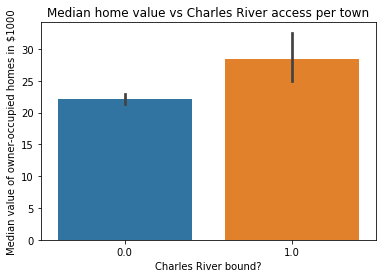

In [5]:
ax = sns.barplot(y=boston_df['MEDV'], x=boston_df['CHAS']).set(
    title='Median home value vs Charles River access per town',
    ylabel = 'Median value of owner-occupied homes in $1000',    
    xlabel = 'Charles River bound?'
)
plt.show()

Charles River bound towns have a larger median value - however is it significant? --> Task 5

**Comparison of median value for towns with different shares of old buildings**

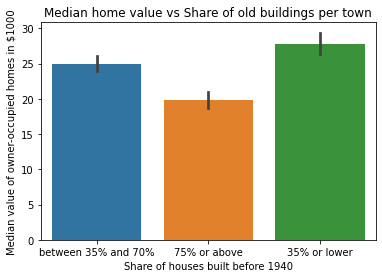

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35% or lower'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35% and 70%'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '75% or above'
ax = sns.barplot(y=boston_df['MEDV'], x=boston_df['age_group']).set(
    title='Median home value vs Share of old buildings per town',
    ylabel = 'Median value of owner-occupied homes in $1000',    
    xlabel = 'Share of houses built before 1940'
)
plt.show()

For towns with higher shares of old buildings, the median home value goes down

**Nox concentration vs non retail business density**

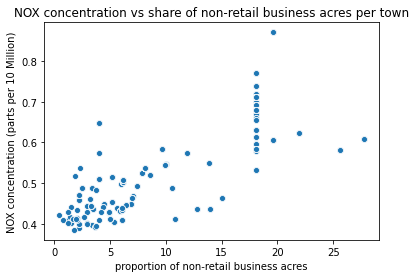

In [7]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df).set(
    title='NOX concentration vs share of non-retail business acres per town',
    ylabel = 'NOX concentration (parts per 10 Million)',    
    xlabel = 'proportion of non-retail business acres'
)
plt.show()

By eye, slight correlation between share of non retail business acres and NOX concentration. Interesting anomaly at 18% - unclear why so many towns have 18% share

**Histogram of pupil-teacher ratios by town**

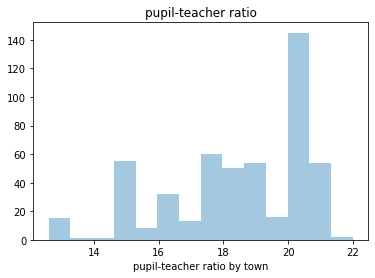

In [8]:
ax = sns.distplot(boston_df['PTRATIO'], kde=False).set(
    title='pupil-teacher ratio',    
    xlabel = 'pupil-teacher ratio by town'
)
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided.

**Is there a significant difference in median value of houses bounded by the Charles river or not?**

T-Test for independent samples

H_0 : Mean is the same for towns bounded by the Charles river and Towns not bounded by Charles river

H_1 : There is a different in Mean for both distributions

In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The alpha is with 7.39e-05 smaller than the alpha value of 0.05. Thus we reject the null hypothesis and we have a statistical difference in median house prices of towns bounding the river and towns not bounding the river

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

ANOVA

H_0 : Mean for all three age groups is the same

H_1 : At least one mean differs

In [10]:
young = boston_df[boston_df['age_group'] == '35% or lower']['MEDV']
middle = boston_df[boston_df['age_group'] == 'between 35% and 70%']['MEDV']
old = boston_df[boston_df['age_group'] == '75% or above']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(young, middle, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


As the P value is below alpha = 0.05, the null hypothesis is rejected and we have evidence that at least one mean differs

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

(Pearson Correlation)

H_O : There is no correlation between NOX concentration and share of non-retail business acres per town

H_1 : There is such correlation

In [11]:
statistic, pvalue = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print("P-Value = " + str(pvalue))

P-Value = 7.913361061238693e-98


Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between proportion of non-retail business acres and NOX concentration.

**What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?**

(Regression analysis)

H_0: There is no correlation between the distance score and the MEDV
H_1: There is a correlation between the distance score and the MEDV


In [12]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        10:01:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**:
- p < 0.05 --> There is a correlation between Distance and median Value
- The coef for DIS shows, that if the score for the weighted distance increases, the median house price in $1000 increases by 1.09